In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix 

In [13]:
datatrain = pd.read_csv("train.csv")
datatest = pd.read_csv("test.csv")

In [55]:
datatrain.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [69]:
datatrain.head(-10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6,1577
1129,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6,1578
1130,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
1131,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,1582


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
datatrain.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

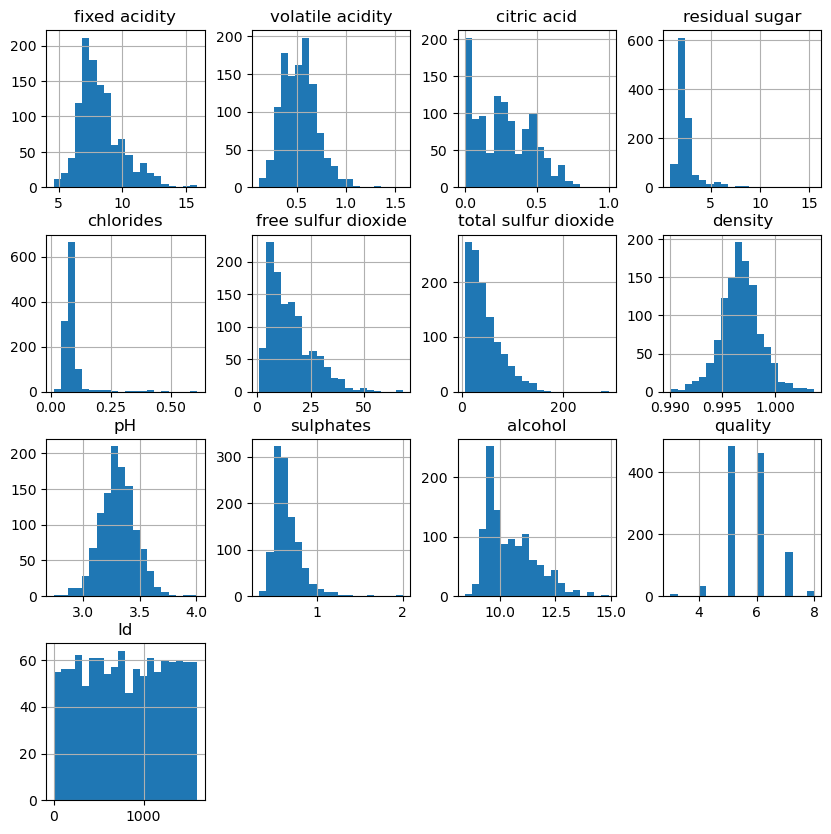

In [15]:
datatrain.hist(bins=20,figsize=(10,10))
plt.show()

In [16]:
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

NameError: name 'data' is not defined

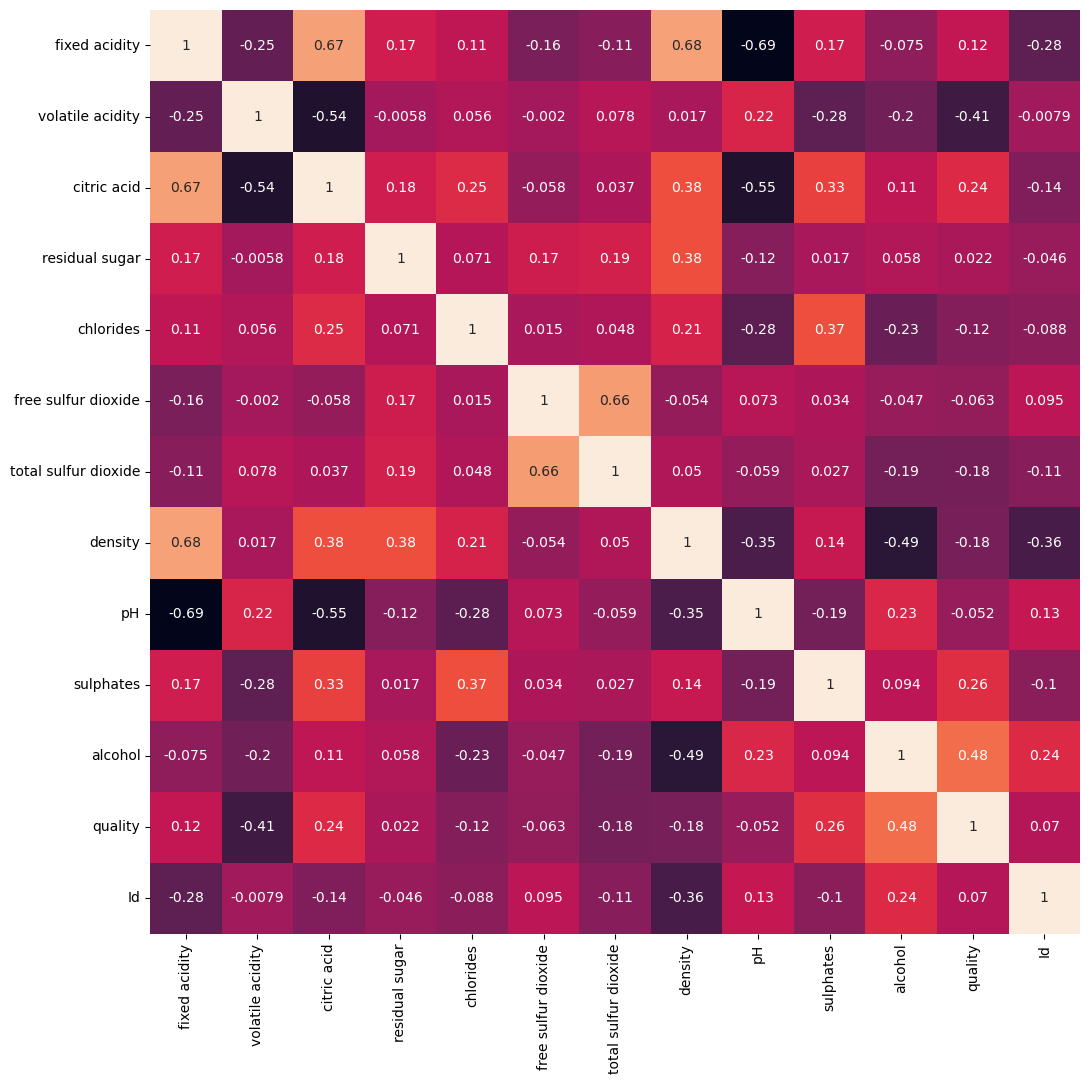

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [17]:
plt.figure(figsize=(12,12))
sb.heatmap(datatrain.corr(),annot =True,cbar=False)
plt.show()
corrmat = datatrain.corr()
corrmat2 = corrmat['quality'].sort_values(ascending = False)
print(corrmat2)


In [19]:
datatrain['goodquality'] =[1 if x>6 else 0 for x in datatrain.quality]   

In [20]:
datatrain['goodquality'].value_counts()

0    984
1    159
Name: goodquality, dtype: int64

In [21]:
X = datatrain.drop(['quality','goodquality','Id'],axis=1)
y = datatrain['quality']


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [59]:
X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
675,9.0,0.36,0.52,2.10,0.111,5.0,10.0,0.99568,3.31,0.62,11.3
653,8.6,0.47,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
845,7.7,0.57,0.21,1.50,0.069,4.0,9.0,0.99458,3.16,0.54,9.8
1027,6.9,0.58,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.7
1023,10.0,0.38,0.38,1.60,0.169,27.0,90.0,0.99914,3.15,0.65,8.5
...,...,...,...,...,...,...,...,...,...,...,...
626,6.8,0.57,0.00,2.50,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
1016,7.6,0.41,0.33,2.50,0.078,6.0,23.0,0.99570,3.30,0.58,11.2
165,8.2,1.00,0.09,2.30,0.065,7.0,37.0,0.99685,3.32,0.55,9.0
7,7.3,0.65,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0


In [24]:
norm = StandardScaler()


In [60]:
xtrain = norm.fit_transform(X_train.values)

In [62]:
xtest = norm.transform(X_test.values)


In [81]:
models = [LogisticRegression(),SVC(kernel='rbf'),RandomForestRegressor()]
for m in models:
    mod = m
    m.fit(xtrain,y_train)
    y_pred_test = m.predict(X_test).round()
    print(f'{m}:')
    print('Score',m.score(xtrain,y_train.values))
    print('Taux D erreur',np.sqrt(mse(y_test,y_pred_test)))
    print()

/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


LogisticRegression():
Score 0.6159737417943107
Taux D erreur 1.1949676138930607

SVC():
Score 0.6728665207877462
Taux D erreur 1.063486890757111

RandomForestRegressor():
Score 0.9235151484289401
Taux D erreur 0.8514052088719701



/Users/hichemcheriet/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
